<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S6_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 6
## Computational complexity of network problems

# Problem 1


Corresponds to the restaurant problem discusses in class (how to choose the cuisine for a bunch of restaurant locations operated by the same company when it is known which ones share a significant amount of clientele).

Graph coloring **bold text**

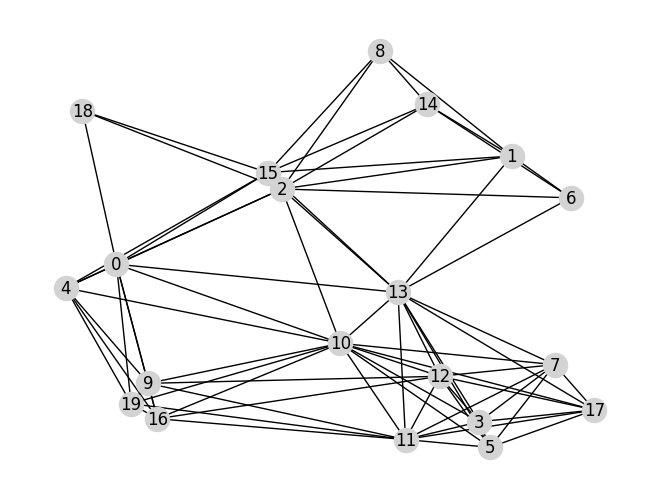

In [19]:
import networkx as nx
from random import random

n = 20 # order
r = 0.4 # radius
pos = { i: (random(), random()) for i in range(n) }
G = nx.random_geometric_graph(n, r, pos = pos)

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'lightgray')
l = nx.draw_networkx_labels(G, pos = coords)

In [20]:
result = nx.coloring.greedy_color(G, strategy = 'largest_first')
print(result)

{10: 0, 13: 1, 2: 2, 11: 2, 0: 3, 12: 3, 15: 0, 3: 4, 4: 1, 5: 5, 7: 6, 9: 4, 16: 5, 17: 7, 1: 3, 19: 6, 14: 1, 6: 0, 8: 4, 18: 1}


In [21]:
used = set(result.values())
print(used)
count = len(used)

{0, 1, 2, 3, 4, 5, 6, 7}


In [22]:
import seaborn as sns

In [23]:
colors = sns.color_palette('husl', count)
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [24]:
ca = []
for v in G.nodes():
  ca.append(colors[result[v]])
print(ca[:3])

[(0.19783576093349015, 0.6955516966063037, 0.3995301037444499), (0.19783576093349015, 0.6955516966063037, 0.3995301037444499), (0.5920891529639701, 0.6418467016378244, 0.1935069134991043)]


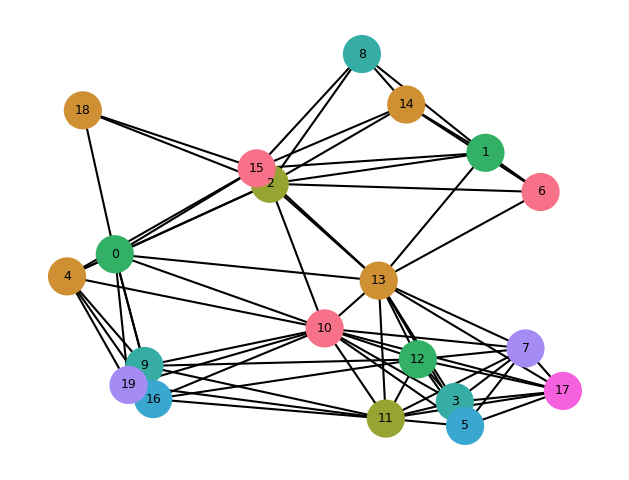

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 3), dpi =  150)
coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = ca)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

# Problem 3

Corresponds to the problem of connecting a set of residential buildings with fiber optics and using as little cable as possible, as discussed in class.

**Minimum spanning tree**

In [26]:
n = 20 # order
r = 0.5 # radius
pos = { i: (random(), random()) for i in range(n) }
G = nx.random_geometric_graph(n, r, pos = pos)

coords = nx.get_node_attributes(G, 'pos')
mst = nx.minimum_spanning_tree(G, weight = "cost", algorithm = "kruskal")
print(G, mst)

Graph with 20 nodes and 76 edges Graph with 20 nodes and 19 edges


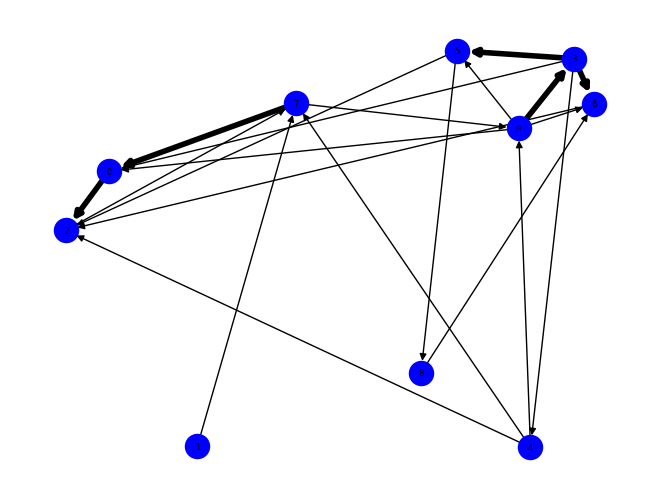

In [36]:
thick = 4
thin = 1
ew = [ thick if e in mst.edges else thin for e in G.edges() ]

nx.draw(G, coords, node_color = 'blue', width = ew)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)

# Problem 3

Corresponds to the vehicular traffic capacity maximization between a residential neighborhood and a huge factory that was discussed in class.

**Network flow**

In [28]:
n = 10
m = n + 10

import networkx as nx

attempts = 50
while attempts > 0:
  U = nx.gnm_random_graph(n, m)
  if nx.is_connected(U):
    print('Connected!')
    break
  attempts -= 1

if attempts == 0:
  print('Try again with more edges')
else:
  print('Good to go', G)

Connected!
Good to go Graph with 20 nodes and 76 edges


In [29]:
G = U.to_directed(U) # orient the edges
from random import random

keep = set()
for u, v in G.edges():
    if random() < 0.5 and (v, u) not in keep:
      keep.add((u, v))
    elif (u, v) not in keep:
      keep.add((v, u))

for u in G.nodes():
    for v in G.nodes():
      if G.has_edge(u, v):
        if not (u, v) in keep:
          G.remove_edge(u, v)

print(G)

DiGraph with 10 nodes and 20 edges


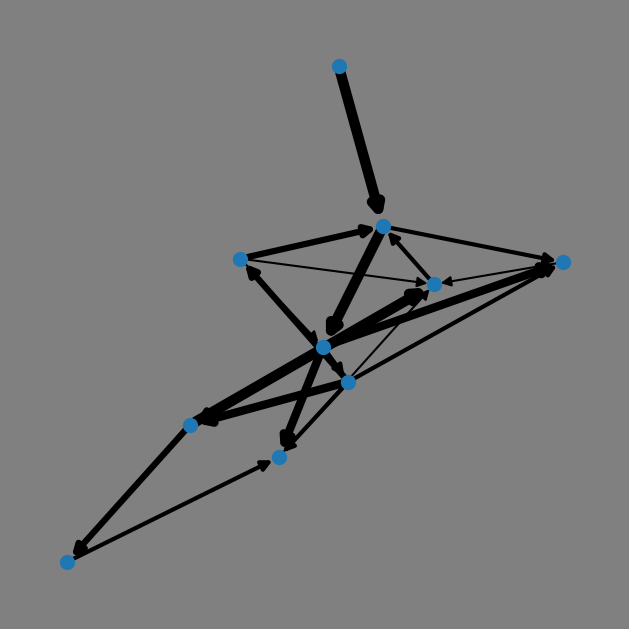

In [30]:
from random import randint
low = 1
high = 5
for u, v in G.edges():
  G[u][v]['capacity'] = randint(low, high)

w = [ G[u][v]['capacity'] for u, v in G.edges ]
L = nx.spring_layout(G)

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = w, node_size = 40)
fig.set_facecolor('gray')
plt.show()

In [31]:
highest = 0
pair = None
config = None

for s in G.nodes(): # all possible sources
  for t in G.nodes(): # all possible sinks
    if s != t: # makes little sense for the same node to be both source and sink
      maxflow = nx.maximum_flow(G, s, t)
      value = maxflow[0] # maximum flow in units
      flow = maxflow[1] # a dictionary of the flow on each edge (as an adjacency list)
      active = sum( [ sum( [ f > 0 for f in flow[v].values() ] ) for v in flow ] )
      if value > 1 and active > 1: # see the interesting ones (more than one unit flows along two or more edges)
        if value > highest:
            print(f'A new record: total flow of {value} units from {s} to {t} along {active} edges')
            highest = value
            pair = (s, t)
            config = flow

A new record: total flow of 5 units from 1 to 0 along 4 edges
A new record: total flow of 7 units from 3 to 0 along 12 edges
A new record: total flow of 8 units from 3 to 2 along 13 edges


In [32]:
status = dict()
for v in config:
  for (u, units) in config[v].items():
    if units > 0:
      G[v][u]['flow'] = units
      cap = G[v][u]['capacity']
      status[(u, v)] = f'{units}/{cap}'

3 2 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


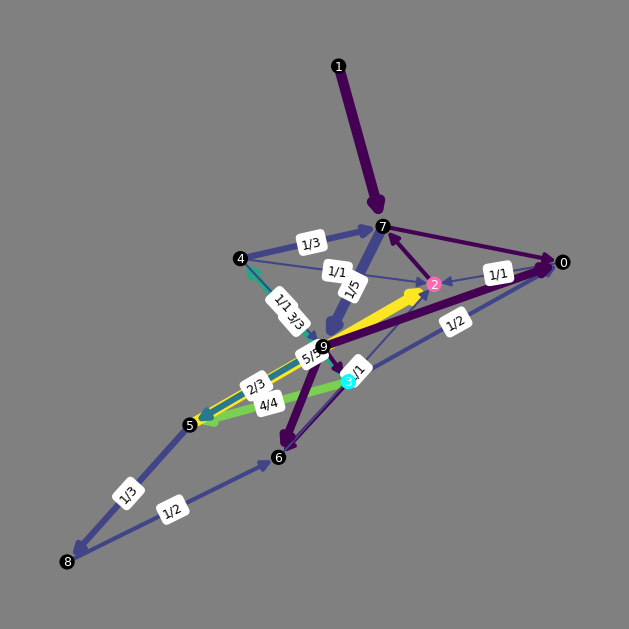

In [33]:
f = [ G[u][v]['capacity'] for u, v in G.edges ]
c = [ G[u][v].get('flow', 0) for u, v in G.edges ]

(s, t) = pair
print(s, t, G.nodes)
Vc = [ 'cyan' if v == s else ('hotpink' if v == t else 'black') for v in G.nodes ]

fig = plt.figure(1, figsize = (4, 4), dpi =  150)
nx.draw(G, pos = L, width = f, node_size = 40, node_color = Vc, edge_color = c, cmap = plt.cm.Greens)
nx.draw_networkx_edge_labels(G, L, status, font_size = 6)
nx.draw_networkx_labels(G, L, font_size = 6, font_color='white')
fig.set_facecolor('gray')
plt.show()

# Problem 4

Extra problem :)

**Travelling salesperson problem** (TSP)

In [42]:
t = 20 # how many towns
G = nx.Graph()

for i in range(t):
  x = random()
  y = random()
  G.add_node(i, pos = (x, y)) # call the towns 0, 1, 2, ...

from math import sqrt

def distance(p1, p2):
  (x1, y1) = p1
  (x2, y2) = p2
  return sqrt((x1 - x2)**2 + (y1 - y2)**2)

for t1 in G.nodes:
  l1 = G.nodes[t1]['pos']
  for t2 in p.nodes:
    if t1 != t2:
      l2 = G.nodes[t2]['pos']
      cost = distance(l1, l2)
      G.add_edge(t1, t2, weight = cost)

In [43]:
c = nx.approximation.traveling_salesman_problem(G)
print(c)

[0, 28, 26, 14, 12, 21, 13, 25, 22, 2, 5, 18, 16, 29, 15, 1, 7, 3, 24, 27, 23, 17, 11, 6, 19, 8, 9, 4, 10, 20, 0]


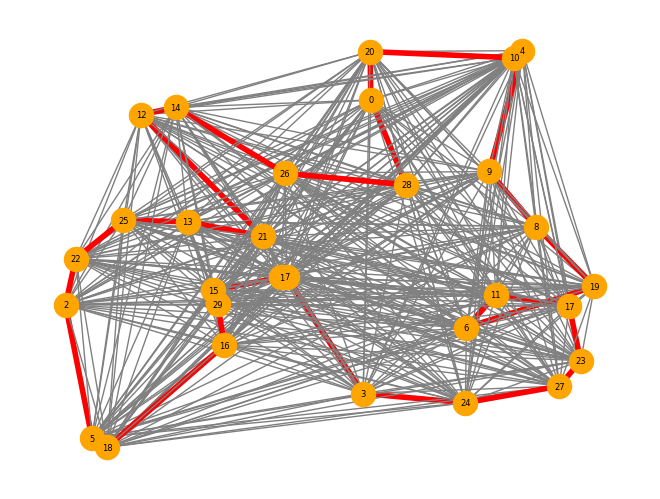

In [49]:
used = []
v = None
w = None
for u in c:
  if v is None:
    v = u
  elif w is None:
    w = u
  else:
    used.append((v, w))
    v, w = w, u
used.append((v, w))
used.append((w, c[0]))

both = []
for e in used:
  both.append(e)
  (s, t) = e
  both.append((t, s))

thick = 4
thin = 1
ew = [ thick if e in both else thin for e in G.edges() ]
ec = [ 'red' if e in both else 'gray' for e in G.edges() ]

coords = nx.get_node_attributes(G, 'pos')
nx.draw(G, coords, node_color = 'orange', width = ew, edge_color = ec)
l = nx.draw_networkx_labels(G, pos = coords, font_size = 6)